# Decision Tree Exercises

In this notebook we will have you solve some DT-related problems. We will provide the solution as a hidden cell under the same question cell. Ready? Begin!

# One: ROC & ROC-AUC

In decision trees, we need to have a good measure for the success of oru classification at each branch. We have used these measures before, these measrues include:

* Precision/Recall
* Accuracy
* F-Score (F1)
* Qrecall
* Pearson Correlation
* ROC
* ROC-AUC


Let's define ROC and ROC-AUC.

ROC stands for *receiver operating charactristics*. They are useful for predicting the binary outcomes. In ROC, Xs are false positive rate and Ys are true postiive are true postive rates. AUC stands for AREA UNDER CURVE and is the integral of ROC. 

$ ROC = \{(y_{FP}, y_{TP}) \forall  y = W^TX\}$

$AUC_{ROC} = \int ROC $

Where:

`True Positive Rate = True Positives / (True Positives + False Negatives)`

And

`False Positive Rate = False Positives / (False Positives + True Negatives)`

Now, run this cell to wget the Iris dataset:

In [ ]:
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

--2021-03-08 05:24:49--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2021-03-08 05:24:50 (56.3 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
import pandas as pd

df_full = pd.read_csv("/content/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Your task is:

1. Convert `species` to numerical labels. Selectw two labels.
2. Shuffle the dataset.
3. Import `from sklearn.tree import DecisionTreeClassifier` and use it without any hyperparams to classify Iris, sans Setosa.
4. Draw the confusion matrix.
5. Use matplotlib to draw this supposed ROC curve.
6. Calculate the AUC.

Reveal the following cell for the solution of this problem.

# One Answer: ROC & ROC-AUC Solution

[[ 8  0]
 [ 0 17]]


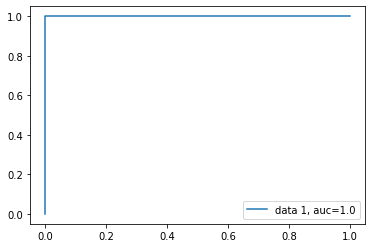

In [ ]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df_full[df_full["species"] != "setosa"].reset_index()

df["labels"] = LabelEncoder().fit_transform(df["species"])

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :3], df.loc[:, "labels"], shuffle=True)

logreg = DecisionTreeClassifier().fit(X_train, y_train)

pred = logreg.predict(X_test)

conf_mat = confusion_matrix(y_test, pred)

print(conf_mat)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# Two: Splitting Criteria - Gini Index, Cross-Entropy and Chi-Squared Test

In decision trees, three metrics can be used as criteria for splitting the branching. These metrics include:

1. Cross-Entropy
2. Gini Coefficient
3. Chi-Squared Test


## Cross-Entropy

Cross-Entropy is defined as the information gain of two classifiers, the amount of *suprprise* earned upon realizing receiving the information of one classifier compared to another.

If the distribution is discrete it is defined as:

$H(p, q) = -\frac{1}{N}\sum_{x \in \mathcal{X}} p(x) \log{q(x)} $

Where p is the targets and q is the predictions.

Note: Cross Entropy is also called *log-loss*.

## Gini Coefficient

Gini Coefficient is an index of impurity and measures the divergence of probabability and for an array x (in our case, the distribution) it is defined as:

$Gini(x) = \frac{\sum_{i=1}^{n}(2i - n - 1) x_i}{n\sum_{i=1}^nx_i}$

## Chi-Squared Test

Chi-Squared test is a measure of information gain and is defined as:

$ \mathcal{X}^2 = \sum_{i} \frac{(X_i - E[X_i])^2}{E[X_i]}$

Where X is the observed value and E[X] is the expected value. 

Use a Decision Tree Classifier from Scikit-Learn and use these metrics to compute the error.

#Two Answer: Cross-Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

df_lab = df_full[df_full["species"] != "setosa"].reset_index()

df_lab["labels"] = LabelEncoder().fit_transform(df["species"])

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :3], df.loc[: , "labels"])

p = DecisionTreeClassifier().fit(Xp_train, yp_train)

p_predict = p.predict(X_test)


log_loss(y_test, p_predict)

1.3815510557964281

# Two Answer: Gini Coefficient

In [ ]:
array = df_lab.loc[:, "labels"]

if np.amin(array) < 0:
  array -= np.amin(array) 

array += 0.0000001
array = np.sort(array)
index = np.arange(1,array.shape[0]+1)
n = array.shape[0]
gini_coeff = ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

gini_coeff

0.49999990000001987

# Two Answer: Chi-Squared Test

In [ ]:
from scipy.stats import chisquare

chisquare(df_lab.loc[:, "labels"])

Power_divergenceResult(statistic=49.999990000002015, pvalue=0.9999900545973714)

# Three: Data Impution using k-NN

Sometimes when dealing with datasets, certain records are missing:

|X|Y|Z|
--|--|--|
23|NaN|12|
23|13|NaN|
23|134|313|

We can use k-NN to impute these missing values. You implement it using `from sklearn.impute import KNNImputer`.

1. Load `sample_data/california_housing_test.csv`.
2. Randomly turn some values to NaN.
3. Use Sklearn's K-NN imputer.

#Three Answer

In [ ]:
from sklearn.impute import KNNImputer
from random import randint
import numpy as np

df_cal = pd.read_csv("/content/sample_data/california_housing_test.csv")

df_sub = df_cal.iloc[:200, :]

for i in range(20):
  df_sub[randint(0, df_sub.shape[0]), randint(0, df_sub.shape[1])] = np.nan

df_sub_imputed = KNNImputer().fit_transform(df_sub)

df_sub_imputed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


array([[-1.2205e+02,  3.7370e+01,  2.7000e+01, ...,  6.0600e+02,
         6.6085e+00,  3.4470e+05],
       [-1.1830e+02,  3.4260e+01,  4.3000e+01, ...,  2.7700e+02,
         3.5990e+00,  1.7650e+05],
       [-1.1781e+02,  3.3780e+01,  2.7000e+01, ...,  4.9500e+02,
         5.7934e+00,  2.7050e+05],
       ...,
       [-1.2212e+02,  3.7450e+01,  3.8000e+01, ...,  2.8700e+02,
         2.0096e+00,  1.5570e+05],
       [-1.1948e+02,  3.6540e+01,  2.8000e+01, ...,  3.3500e+02,
         4.2222e+00,  1.0890e+05],
       [-1.2102e+02,  3.7680e+01,  2.5000e+01, ...,  5.7800e+02,
         3.9960e+00,  1.1450e+05]])

# Four: Hyperparameter Tuning with Decision Trees

Important hyperparameters for decision trees include:

* Splitting Criterion: Which we just talked about.
* Max Depth: The max depth of the tree.
* Number of Leaves to Split Upon
* Max Features when splitting


Can you use Scikit-Learn's `RandomizedSearchCV` to tune these parameters?



#Four Answer

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


df_lab = df_full.copy()

df_lab["labels"] = LabelEncoder().fit_transform(df_lab["species"])

X_train, X_test, y_train, y_test = train_test_split(df_lab.iloc[:, :3], df_lab.loc[: , "labels"])


hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(2, 15),
    "min_samples_leaf": range(1, 10),
    "min_samples_split": range(2, 20, 2)
}

clf = DecisionTreeClassifier()
search = RandomizedSearchCV(clf, hyperparams).fit(X_train, y_train)
search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 18}

# Five: Pipelines

Machine Learning oeprations are not comprised of just one model. Sometimes you need to preprocess the data before training an estimator with it. That's where Scikit-Learn's `pipeline` module comes into play.

You're not allowed to use more than one estimator. But you can add as many other models as you desrie. These models are usually scalers.

Can you design a Sklearn pipeline with a Decision Tree and a MinMaxScaler? You can use `sample_data/california_housing_test.csv`.

#Five Answer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


df_lab = df_full.copy()

df_lab["labels"] = LabelEncoder().fit_transform(df_lab["species"])

X_train, X_test, y_train, y_test = train_test_split(df_lab.iloc[:, :3], df_lab.loc[: , "labels"])


pipeline = Pipeline([('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])

pipeline.fit(X_train, y_train)

pipeline.predict(X_test)


array([1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2])

#Six: Feature Selection using Pearson's Correlation Coefficient

When we have a large dataset with an exuberent number of features, we must do feature selection. When the input is numerical and the output, too, is numerical, our best bet for feature selection is Pearson's Correlation Coefficient.

It is defined as:

$r = \frac{\sum_{i = 0}^n (x_i - \bar{x}) (y_i - \bar{y})} {\sqrt{\sum_{i=0}^n(x_i - \bar{x}) ^ 2 \sum_{i=0}^n(y_i - \bar{y})^2}} $

However in Scikit-Learn you just need to use the `FeatureSelection` module. In our answer we'll use `select K best` tool along with Pearson's Correlation Coefficient.

Can you implement it? Use `sklearn.datasets.make_regression`.

# Six Answer

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
fs = SelectKBest(score_func=f_regression, k=10)
X_selected = fs.fit_transform(X, y)

X_selected.shape, "Original Shape: ", X.shape

((100, 10), 'Original Shape: ', (100, 100))

# Seven: Decision Tree Regression

In Decision Tree Regression, instead of a class, our leaves are real values that are predicted using the usual greedy algorithm of Decision Trees.

![Regression Trees](https://imgur.com/download/NUuxZXE/)

This exercise is pretty straightforward.

1. Load up `sample_data/california_housing_train`.
2. Load up `sklearn.tree.DecisionTreeRegressor`.
3. Use what we learned so far to regress `median_house_value` using any relevant feature. You will need to use feature selection, impution (if need be), pipelines and hyperpareter optimization.
4. Calculate MSE and MAE. If they're not desirable, change the scaler model and spend more time on tuning the hyperparameters.

#Seven Answer

## Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

df_cali = pd.read_csv("/content/sample_data/california_housing_train.csv")

X, y = df_cali.iloc[:, :-1], df_cali.iloc[:, -1]

fs = SelectKBest(score_func=f_regression, k=5)
X_selected = fs.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_selected, y)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

hyperparams = {
    "criterion": ["mse", "friedman_mse", "mae", "poisson"],
    "splitter": ['best', 'random'],
    "max_depth": range(2, 15),
    "min_samples_leaf": range(1, 10),
    "min_samples_split": range(2, 20, 2)
}


search = RandomizedSearchCV(DecisionTreeRegressor(), hyperparams)

search.fit(X_train, y_train)

best_regressor = search.best_estimator_


## Pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("sccaler", MinMaxScaler()), ("estimator", best_regressor)])



## Training

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipeline.fit(X_train, y_train)


pred = pipeline.predict(X_test)


mean_absolute_error(y_test, pred), mean_squared_error(y_test, pred)

(52202.998751300336, 5498432213.670058)